In [1]:
import pandas as pd
trainOriginal = pd.read_csv('train.csv')

In [2]:
train = trainOriginal
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
# Concateno todos los tuits.
allWords = ''
for text in train.text:
    allWords += ' ' + text.lower()

In [4]:
from wordcloud import STOPWORDS
allWordsWithOutSimbols = allWords.replace('?', '').replace('!', '').replace('[', '').replace(']', '').replace('.', '').replace(',', '').replace(';', '').replace('(', '').replace(')', '').replace('{', '').replace('}', '').replace('-', '').replace('=', '').replace('>', '').replace('<', '').replace('|', '')
stopwords = list(STOPWORDS) + ['&amp'] #'will', 'still', 'got', 'two', 'one', 'us', 'know', 'first']
allWordsWithoutStopWords = []
for word in allWordsWithOutSimbols.split(' '):
    if (word.lower() not in stopwords) & (len(word) > 1):
        allWordsWithoutStopWords.append(word.lower())

In [5]:
top50 = pd.Series(allWordsWithoutStopWords).value_counts().head(50).reset_index()
top50.columns = ['palabra', 'cantidad']
top50 = top50.sort_values(by='palabra')
top50

,palabra,cantidad
15,back,117
13,body,121
26,bomb,100
22,buildings,104
14,burning,117
28,california,99
41,car,88
40,crash,88
29,day,98
37,dead,90


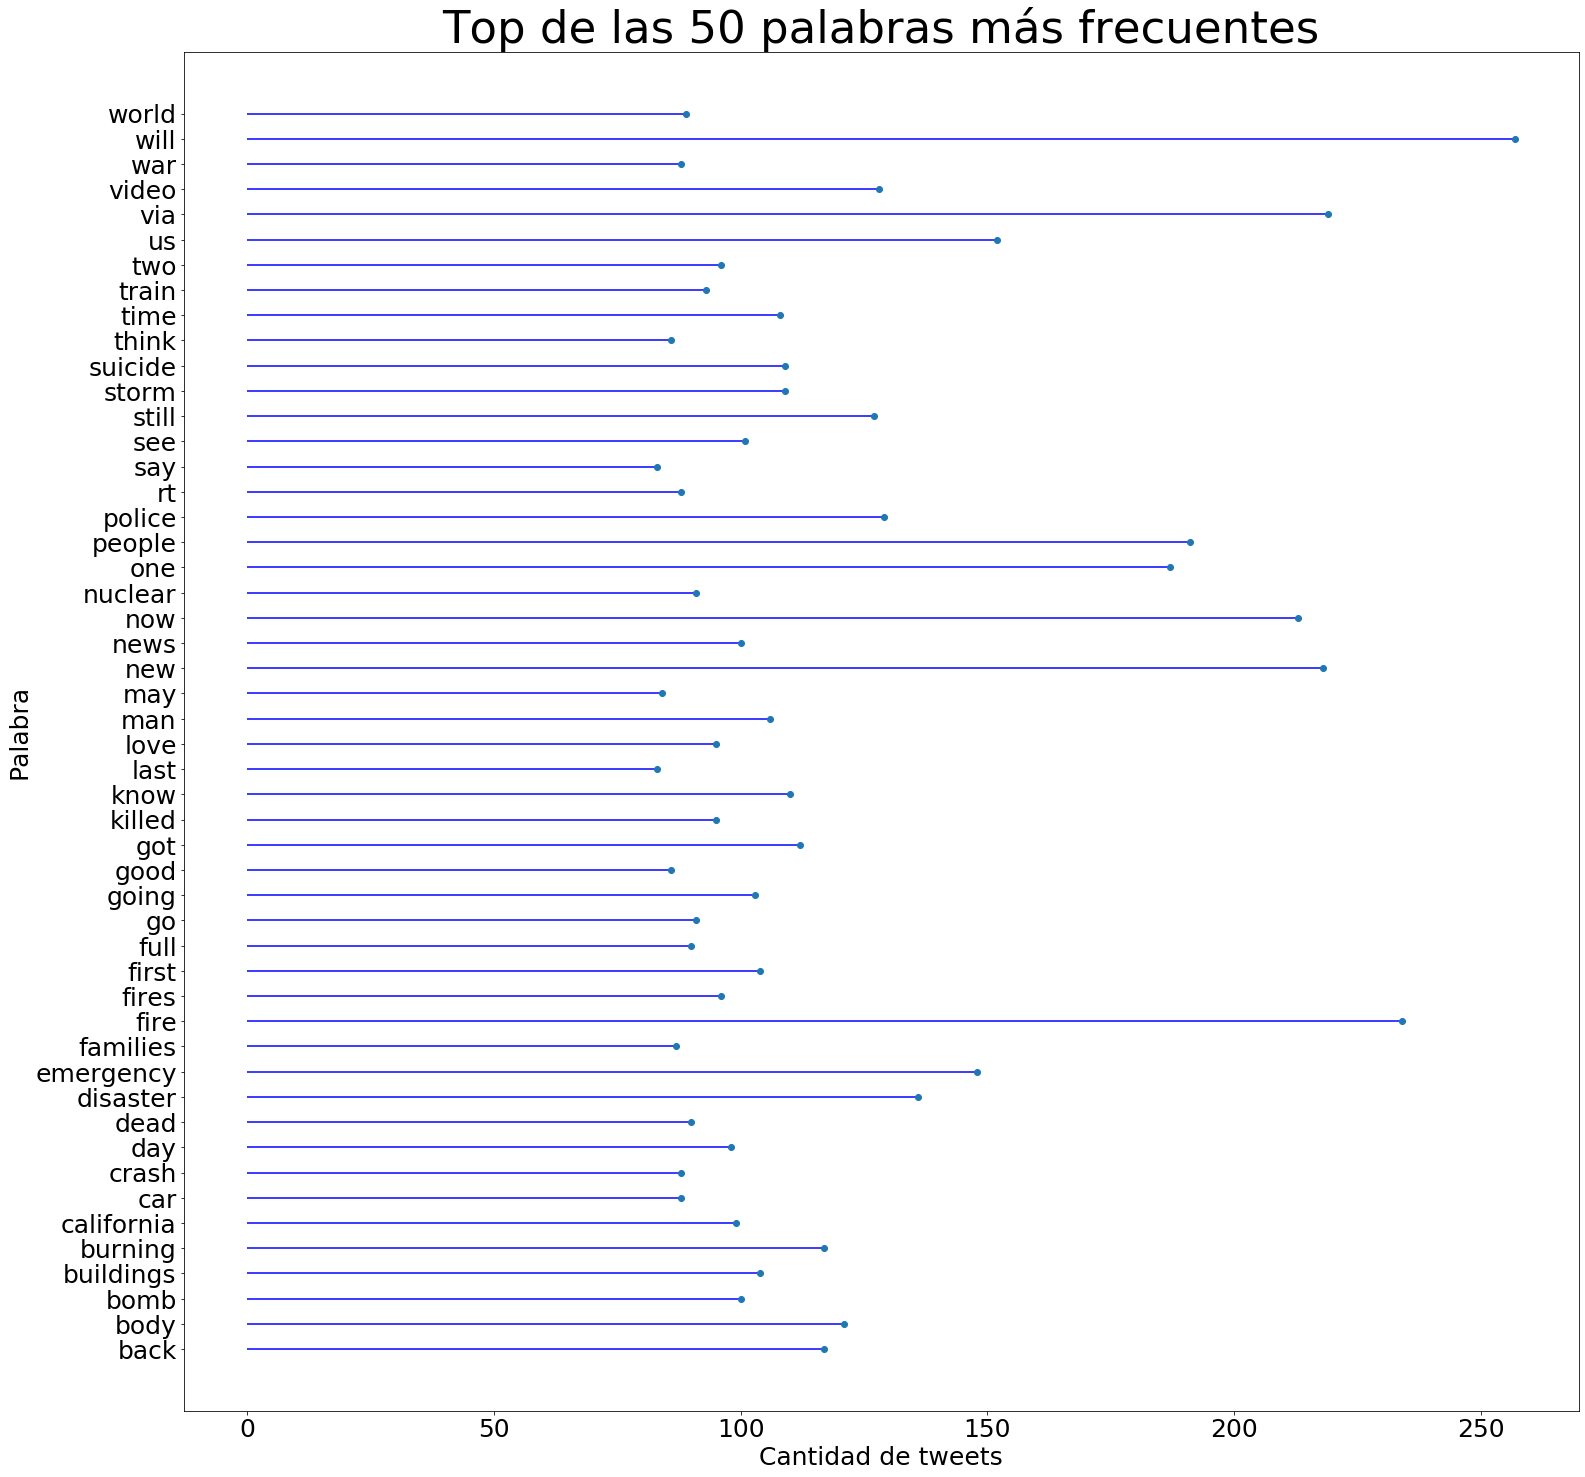

In [32]:
import matplotlib.pyplot as plt
plt.hlines(y=top50.palabra.tolist(), xmin=0, xmax=top50.cantidad.tolist(), color='blue')
plt.plot(top50.cantidad.tolist(), top50.palabra.tolist(), "o")
 
# Add titles and axis names
plt.yticks(top50.palabra.tolist())
plt.title("Top de las 50 palabras más frecuentes", loc='center', fontsize=45)
plt.xlabel('Cantidad de tweets')
plt.ylabel('Palabra')
plt.rcParams["figure.figsize"] = (0,0)
plt.rcParams["figure.figsize"] = (25,25)
plt.rcParams['font.size'] = 20

In [7]:
relationList = ['disaster','bomb','nuclear','emergency']
relationList

['disaster', 'bomb', 'nuclear', 'emergency']

In [8]:
toDic = {}
fromList = []

for index, word in enumerate(allWordsWithoutStopWords):
    if word in relationList:
        if toDic.get(allWordsWithoutStopWords[index+1]) != None:
            toDic[allWordsWithoutStopWords[index+1]] = toDic[allWordsWithoutStopWords[index+1]] + 1
        else:
            toDic[allWordsWithoutStopWords[index+1]] = 1
            fromList.append(word)

In [9]:
dictlist = []
for key, value in toDic.items():
    temp = [key, value]
    dictlist.append(temp)
df = pd.DataFrame(dictlist)
df['from'] = fromList
df.columns = ['to', 'quantity', 'from']
df = df.groupby('from').apply(lambda x: x.sort_values(by=['quantity'], ascending=False)).reset_index(drop=True).groupby('from').head(10)
df = df.drop(df.index[3])
df

,to,quantity,from
0,turkey,22,bomb
1,http://tco/ksawlyux02,6,bomb
2,ass,4,bomb
4,squad,3,bomb
5,dropped,2,bomb
6,editorial:,2,bomb
7,detonation,2,bomb
8,saw,2,bomb
9,program,2,bomb
63,typhoondevastated,25,disaster


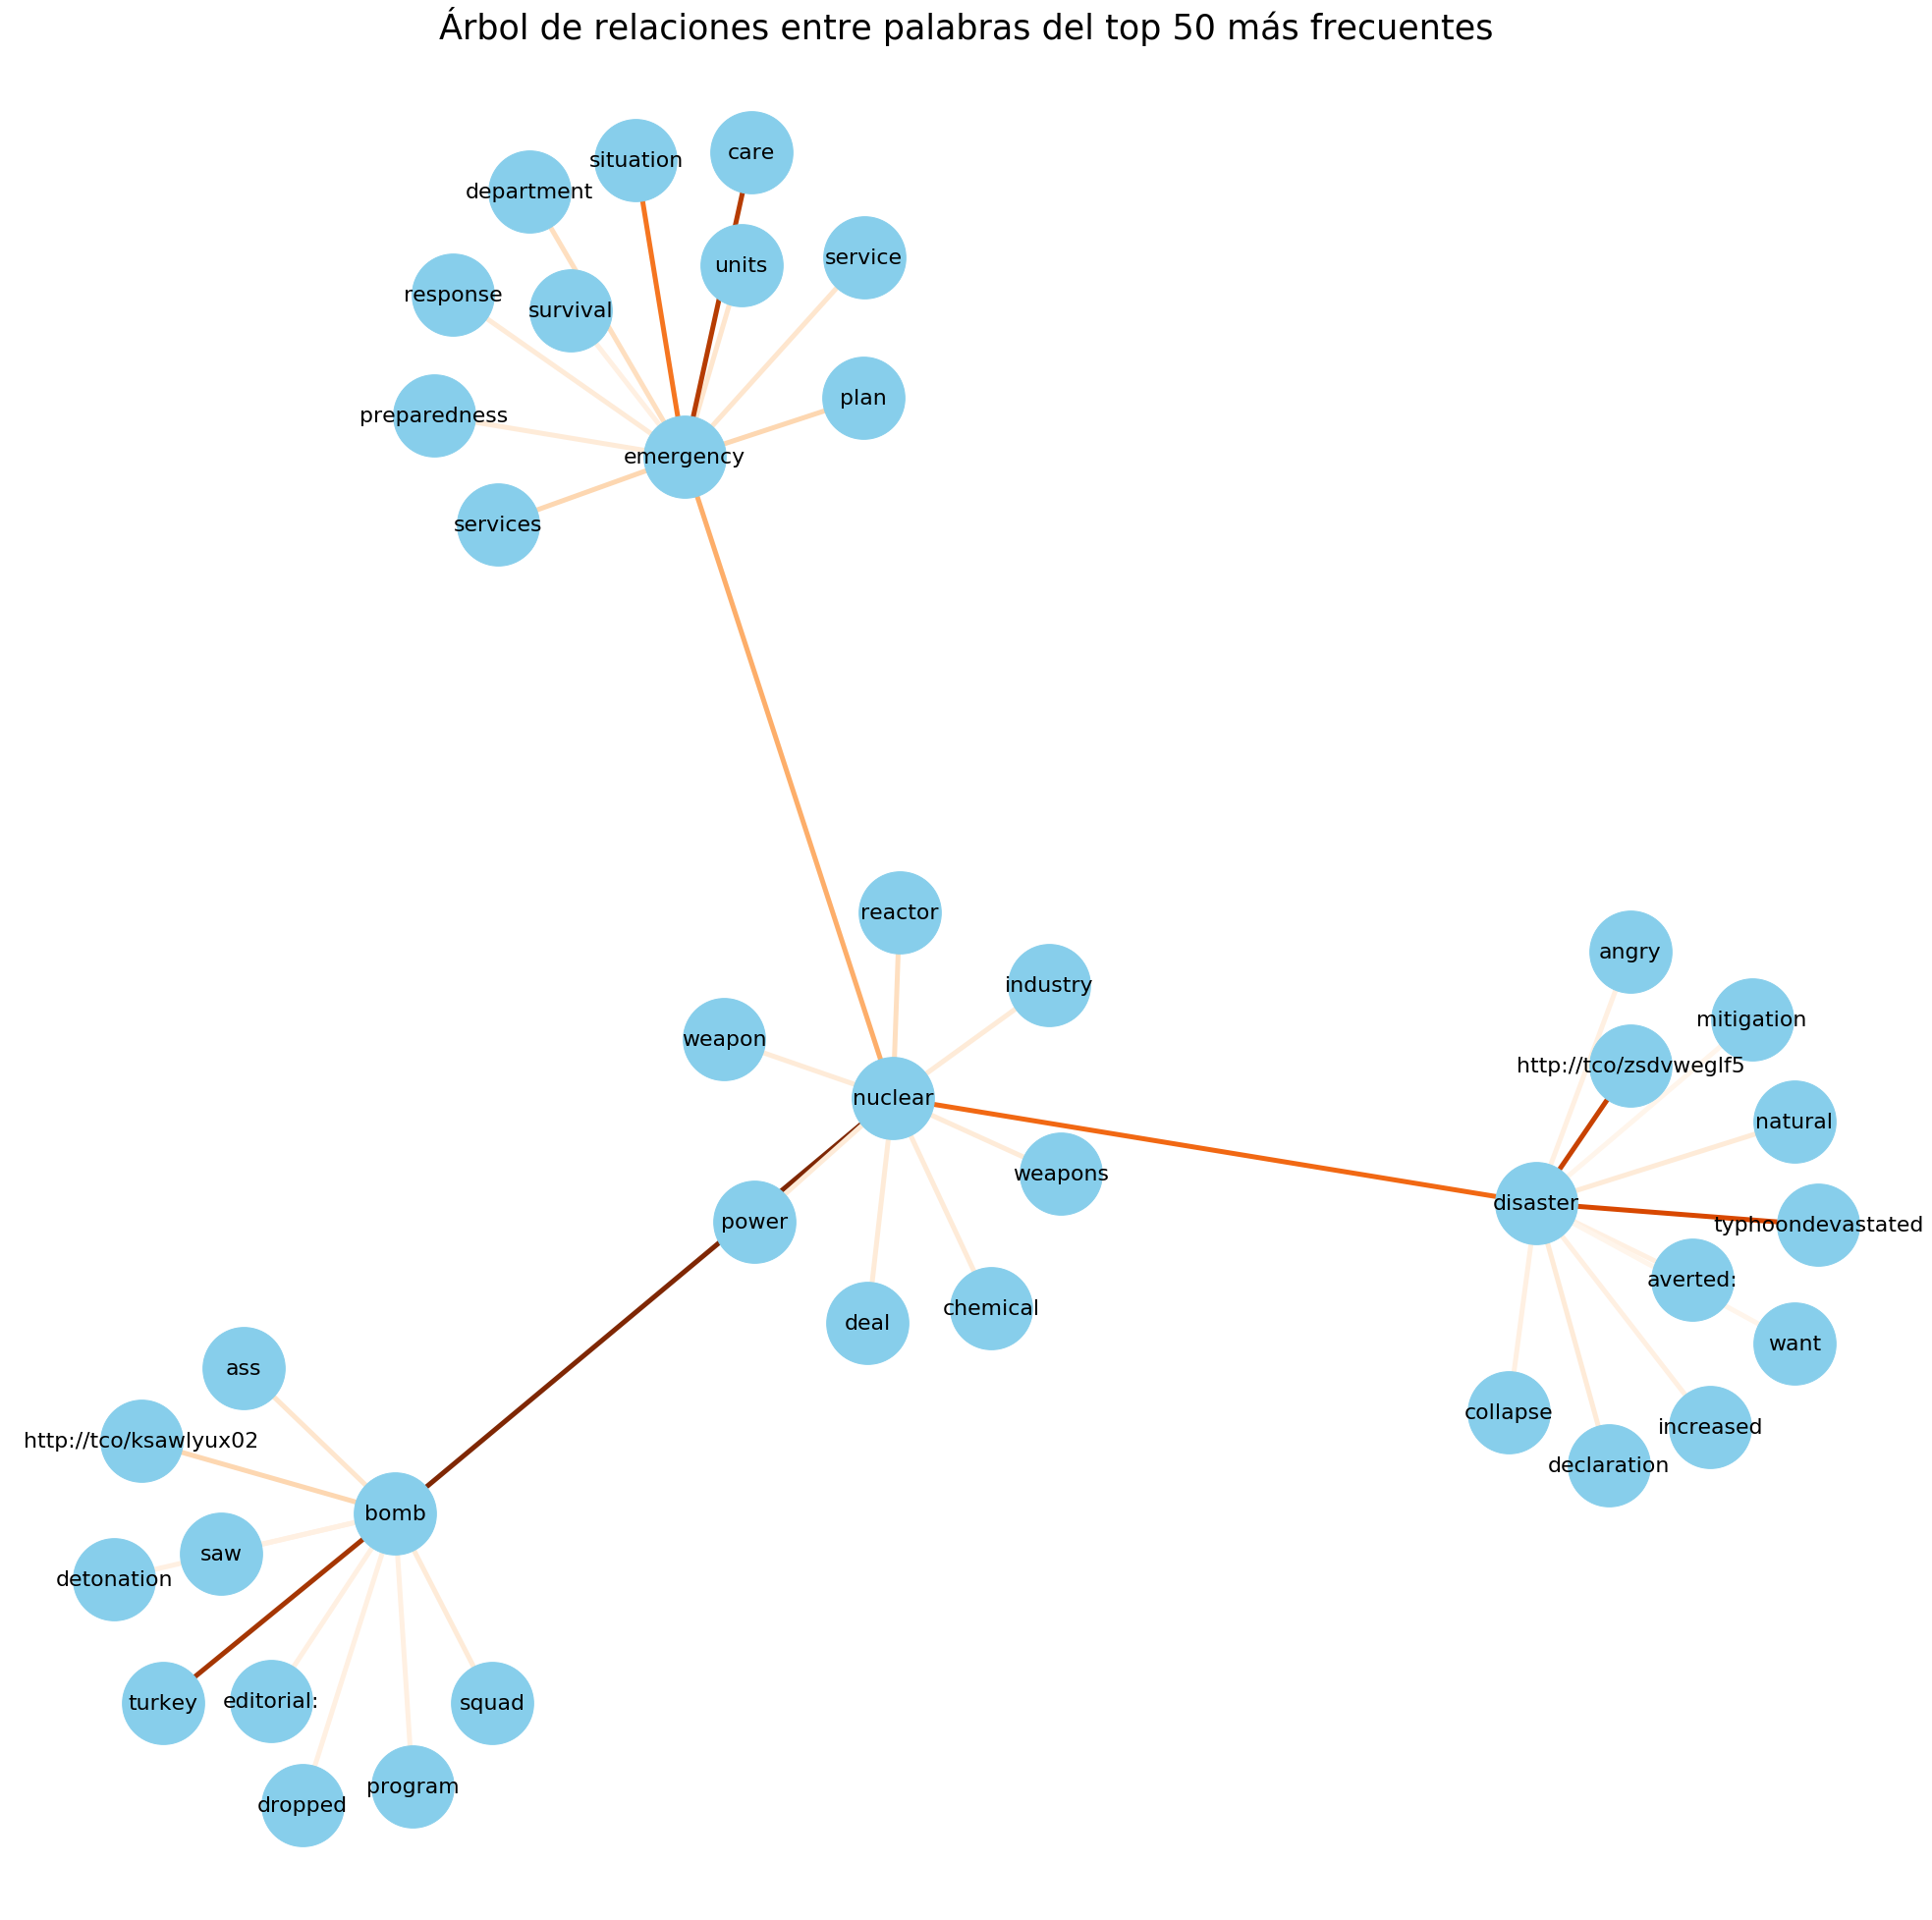

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
plt.title("Árbol de relaciones entre palabras del top 50 más frecuentes", loc='center', fontsize=35)
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph())
plt.rcParams["figure.figsize"] = (0,0)
plt.rcParams["figure.figsize"] = (45,45)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=7000, width=5.0, edge_color=df['quantity'], edge_cmap=plt.cm.Oranges, font_size=22)